<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/%EC%9D%B4%EC%9A%B0%EB%A6%BC_8%2C9%2C10%EC%8B%9C%EA%B0%81%ED%99%94_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import os
os.chdir('/content/drive/MyDrive/ESAA/mini_project1/data')
os.getcwd()

Mounted at /content/drive/


'/content/drive/MyDrive/ESAA/mini_project1/data'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

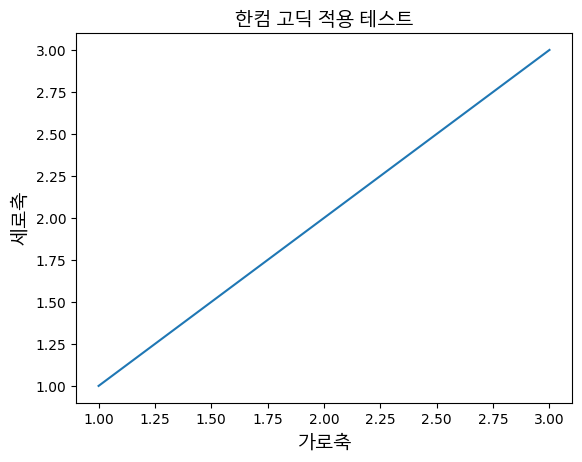

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "/content/drive/MyDrive/font/Hancom_Gothic_Regular.ttf"
fontprop = fm.FontProperties(fname=font_path, size=14)

plt.plot([1, 2, 3], [1, 2, 3])
plt.title("한컴 고딕 적용 테스트", fontproperties=fontprop)
plt.xlabel("가로축", fontproperties=fontprop)
plt.ylabel("세로축", fontproperties=fontprop)
plt.show()

In [4]:
import pandas as pd
df=pd.read_csv('movies_train.csv')
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


# 8. 장르별 평균 관객수 barplot
어느 장르가 평균적인 관객수가 많은가?


/tmp/ipython-input-481822257.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df_grouped.index, fontproperties=fontprop, rotation=45)
/tmp/ipython-input-481822257.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(ax[0].get_yticks(), fontproperties=fontprop)
/tmp/ipython-input-481822257.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontproperties=fontprop, rotation=45)
/tmp/ipython-input-481822257.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(ax[1].get_yticks(), fontproperties=fontprop)


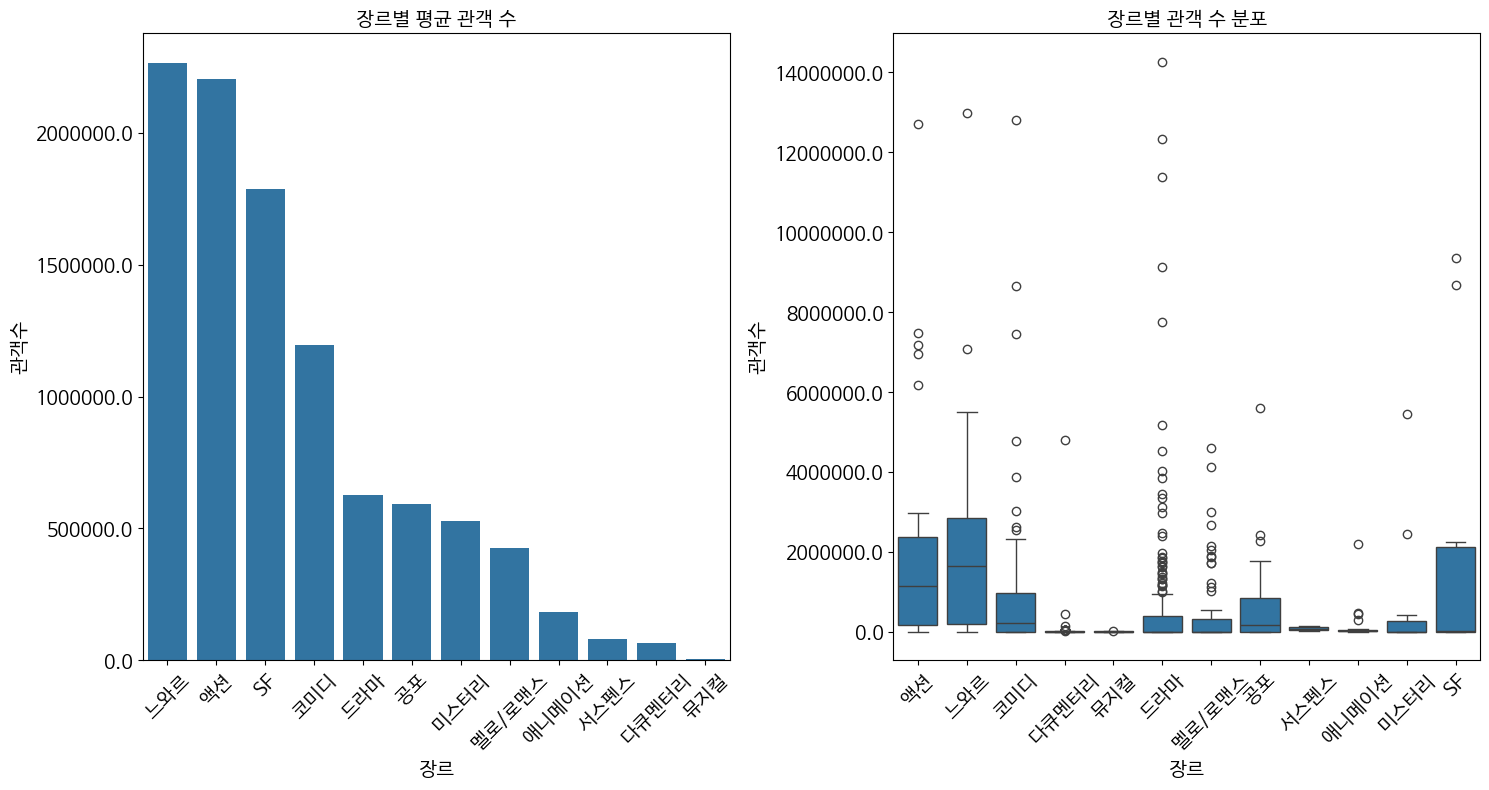

In [34]:
df_grouped=df.groupby('genre')['box_off_num'].mean()
df_grouped=df_grouped.sort_values(ascending=False)
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(15,8))
# barplot
sns.barplot(x=df_grouped.index, y=df_grouped.values, ax=ax[0])
ax[0].set_xlabel('장르', fontproperties=fontprop)
ax[0].set_ylabel('관객수', fontproperties=fontprop)
ax[0].set_title('장르별 평균 관객 수', fontproperties=fontprop)
ax[0].set_xticklabels(df_grouped.index, fontproperties=fontprop, rotation=45)
ax[0].set_yticklabels(ax[0].get_yticks(), fontproperties=fontprop)

# boxplot
sns.boxplot(x='genre', y='box_off_num', data=df, ax=ax[1])
ax[1].set_xlabel('장르', fontproperties=fontprop)
ax[1].set_ylabel('관객수', fontproperties=fontprop)
ax[1].set_title('장르별 관객 수 분포', fontproperties=fontprop)
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontproperties=fontprop, rotation=45)
ax[1].set_yticklabels(ax[1].get_yticks(), fontproperties=fontprop)

plt.tight_layout()
plt.show()

느와르, 액션, sf, 코미디, 드라마 순으로 장르별 평균 관객수가 높다.


**극단값의 영향을 고려하여 박스플롯을 추가로 그려보았을때 드라마와 같은 장르에서
극단값이 많이 나와 이를 제거해야하는가에 대한 논의가 필요하다.**

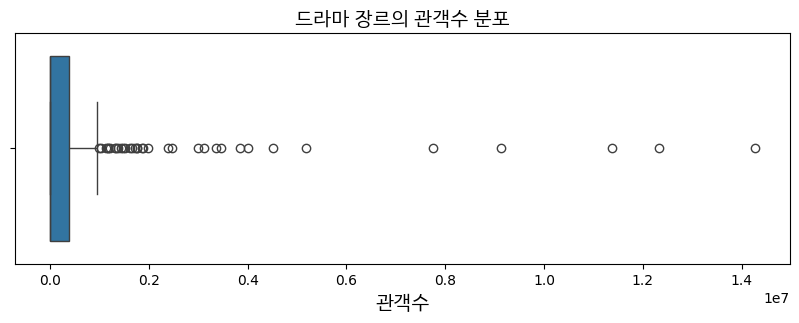

In [40]:
plt.figure(figsize=(10,3))
drama=df[df['genre']=='드라마']
sns.boxplot(x=drama['box_off_num'],data=drama)
plt.title('드라마 장르의 관객수 분포', fontproperties=fontprop)
plt.xlabel('관객수', fontproperties=fontprop)
plt.show()

#9. 배급사 별 평균 관객 수 barplot: 흥행 독점 top10 배급사 확인

/tmp/ipython-input-2433857451.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(df_9.index, fontproperties=fontprop, rotation=45)
/tmp/ipython-input-2433857451.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(df_9.index, fontproperties=fontprop, rotation=45)


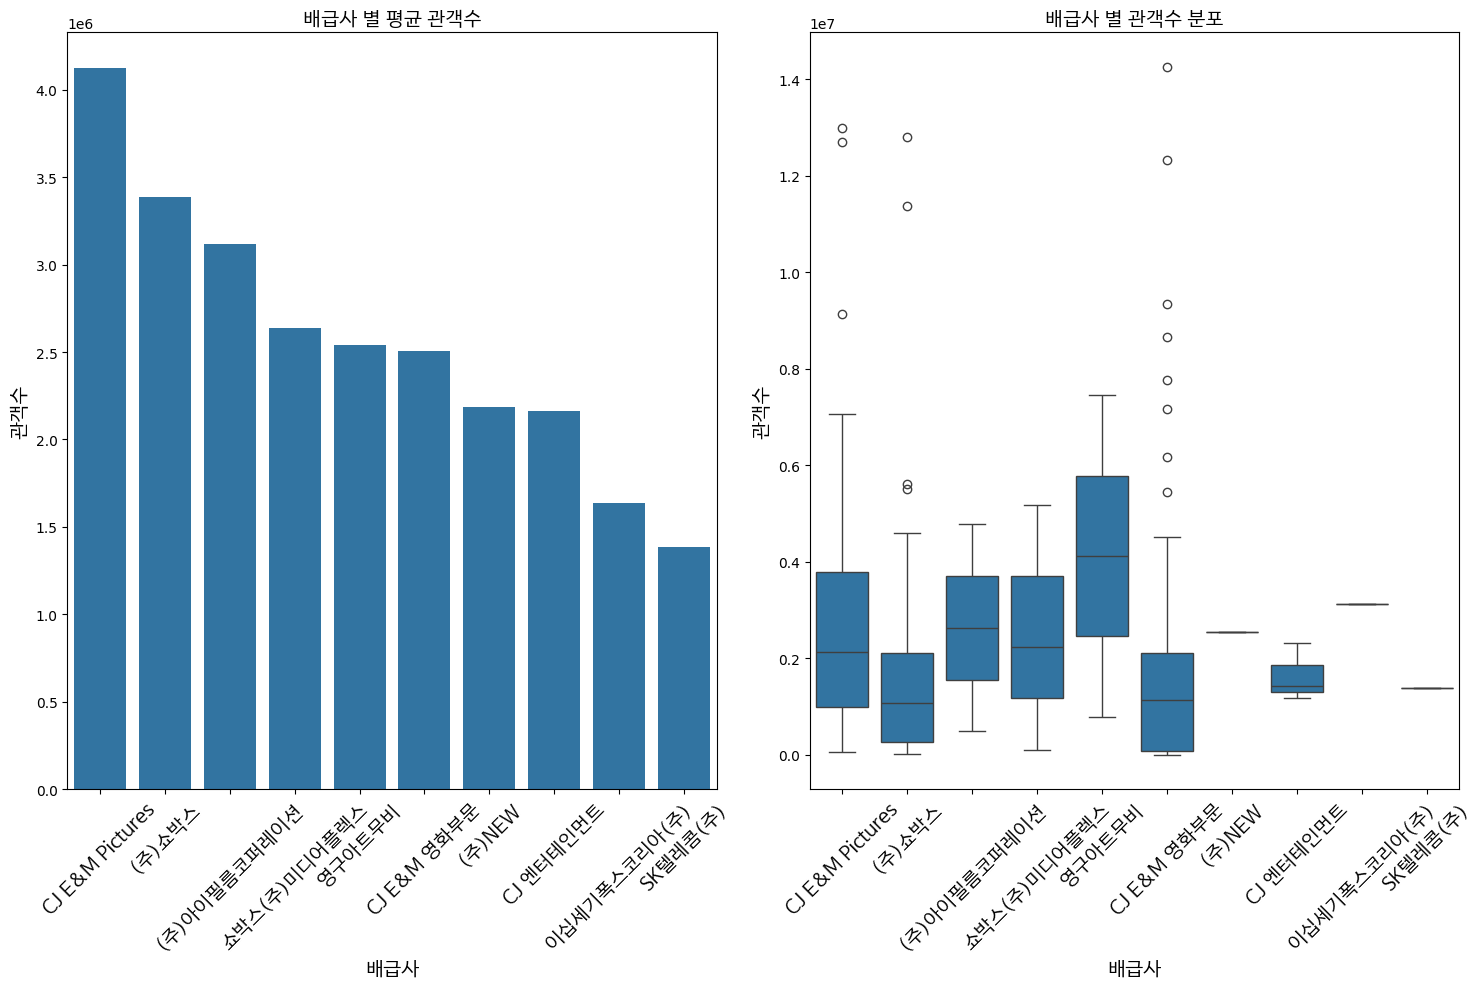

In [48]:
df_9 = df.groupby('distributor')['box_off_num'].mean()
df_9 = df_9.sort_values(ascending=False).iloc[:10]

fig, axes = plt.subplots(1, 2, figsize=(15,10))

# 왼쪽: 상위 10개 배급사 평균 관객 수 barplot
sns.barplot(x=df_9.index, y=df_9.values, ax=axes[0])
axes[0].set_title('배급사 별 평균 관객수', fontproperties=fontprop)
axes[0].set_xlabel('배급사', fontproperties=fontprop)
axes[0].set_ylabel('관객수', fontproperties=fontprop)
axes[0].set_xticklabels(df_9.index, fontproperties=fontprop, rotation=45)
axes[0].tick_params(axis='y', labelsize=10)

# 오른쪽: boxplot (분포 확인용)
sns.boxplot(x='distributor', y='box_off_num', data=df[df['distributor'].isin(df_9.index)], ax=axes[1])
axes[1].set_title('배급사 별 관객수 분포', fontproperties=fontprop)
axes[1].set_xlabel('배급사', fontproperties=fontprop)
axes[1].set_ylabel('관객수', fontproperties=fontprop)
axes[1].set_xticklabels(df_9.index, fontproperties=fontprop, rotation=45)

plt.tight_layout()
plt.show()

CJ E&M PICTURES, (주)쇼박스, (주)아이필름코퍼레이션,쇼박스(주)미디어플렉스,영구아트무비순으로 높은 평균 관객수를 보인다.

극단값을 확인하기 위해 박스플롯을 그려보았을때 중앙값으로 비교하면 **순위가 크게 차이**를 보인다는 것을 확인할 수 있다. **관객 수 예측을 위해 중앙값과 평균값 중 무엇을 사용하는 것이 효과적인지 논의할 필요가 있다.**

#10. 영화 길이와 관객수의 관계 산점도: 상관관계 확인(회귀선 포함)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Hancom Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


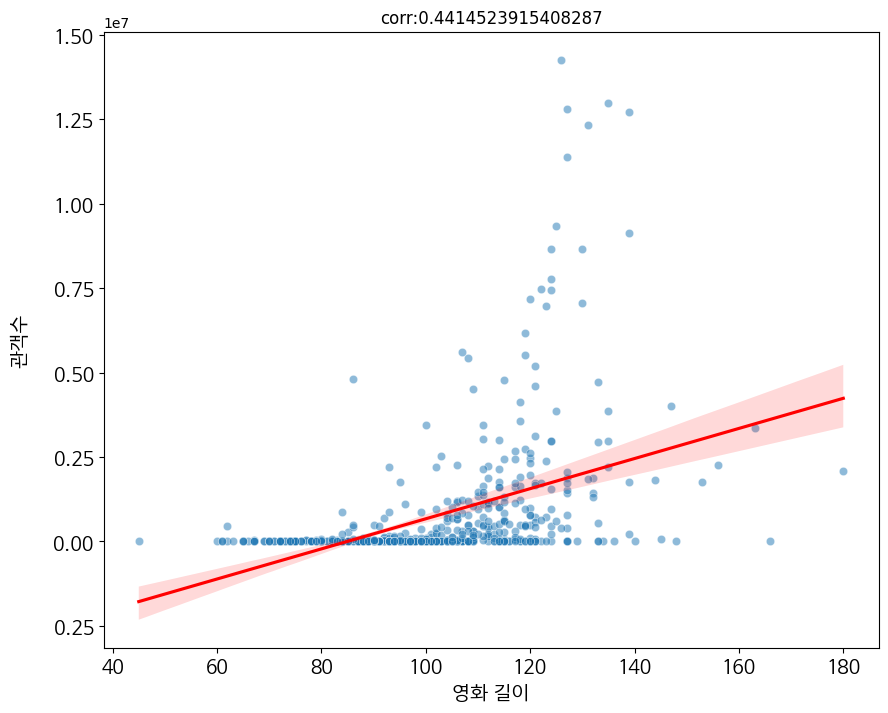

In [65]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='time', y='box_off_num', data=df, alpha=0.5)
corr_num=df[['time', 'box_off_num']].corr().iloc[0,1]
sns.regplot(x='time', y='box_off_num', data=df, scatter=False, line_kws={'color':'red'})
plt.xlabel('영화 길이', fontproperties=fontprop)
plt.ylabel('관객수', fontproperties=fontprop)
plt.title('corr:'+ str(corr_num))
plt.xticks(fontproperties=fontprop)
plt.yticks(fontproperties=fontprop)
plt.show()

양의 상관관계를 보이며 영화길이가 길어질수록 관객수가 많아진다는 예측을 할 수 있다.